In [70]:
from FLAI import data
from FLAI import causal_graph

In [71]:
import pandas as pd
df = pd.read_pickle('Data/titanic.pickle')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [72]:
flai_dataset = data.Data(df, transform=True)

In [73]:
flai_dataset.data.head(5)

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked
0,0,3,108,1,2,1,523,146,3
1,1,1,190,0,2,1,596,81,1
2,1,3,353,0,1,1,669,146,3
3,1,1,272,0,2,1,49,55,3
4,0,3,15,1,1,1,472,146,3


In [74]:
flai_dataset.data.describe()

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,445.000000,0.647587,1.418631,1.295174,338.528620,129.974186,2.529742
std,0.486592,0.836071,257.353842,0.477990,0.827105,0.649433,200.850657,35.677211,0.800254
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,222.500000,0.000000,1.000000,1.000000,158.500000,146.000000,2.000000
50%,0.000000,3.000000,445.000000,1.000000,1.000000,1.000000,337.000000,146.000000,3.000000
75%,1.000000,3.000000,667.500000,1.000000,2.000000,1.000000,519.500000,146.000000,3.000000
max,1.000000,3.000000,890.000000,1.000000,5.000000,3.000000,680.000000,147.000000,3.000000


In [75]:
flai_graph = causal_graph.CausalGraph(flai_dataset)

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).


In [76]:
flai_graph.graph['model_edges']

[('Pclass', 'Embarked'),
 ('Pclass', 'Survived'),
 ('Sex', 'Survived'),
 ('Sex', 'Pclass'),
 ('SibSp', 'Parch'),
 ('Parch', 'Sex')]

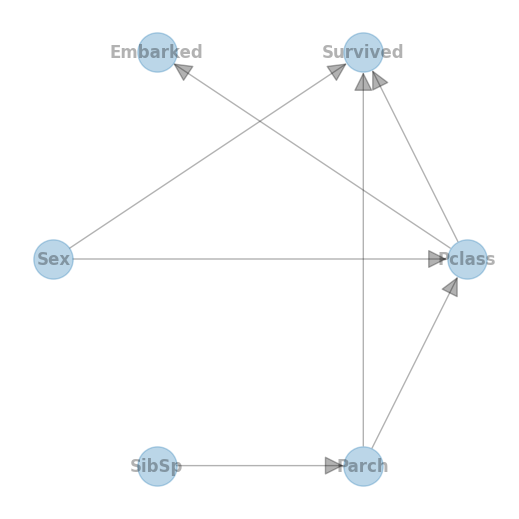

In [117]:
flai_graph.plot(directed = True)

In [78]:
flai_graph.learn_cpd(methodtype = 'maximumlikelihood')

[bnlearn] >Compute structure scores ['k2', 'bds', 'bic', 'bdeu'] for model comparison (higher is better).
[bnlearn] >Warning: Structure scoring could not be computed. DataFrame issues (?)


In [100]:
CPDs = flai_graph.get_CPDs()

In [102]:
CPDs['Pclass']

,Pclass,Sex,Parch,p
0,0,0,0,0.066667
1,0,0,1,0.240413
2,0,0,2,0.262712
3,0,0,3,0.262500
4,0,1,0,0.066667
5,0,1,1,0.240413
6,0,1,2,0.262712
7,0,1,3,0.262500
8,1,0,0,0.133333
9,1,0,1,0.197640


In [103]:
(flai_dataset.data.Pclass.value_counts() / len(flai_dataset.data))
#        model.fit(df, estimator=BayesianEstimator, prior_type=scoretype, equivalent_sample_size=1000, pseudo_counts=smooth, n_jobs=config['n_jobs'])


3    0.551066
1    0.242424
2    0.206510
Name: Pclass, dtype: float64

In [104]:
flai_graph.graph.keys()

dict_keys(['adjmat', 'model', 'methodtype', 'model_edges'])

In [105]:
type(flai_graph.graph['model'])

pgmpy.models.BayesianNetwork.BayesianNetwork

In [106]:
from pgmpy.inference import CausalInference
infer = CausalInference(flai_graph.graph['model'],flai_graph.flai_dataset.data.columns)
q = infer.query(variables=['Pclass'],evidence={'Embarked' : 0})
print(q.scope())
print(q.values)

['Pclass']
[1. 0. 0.]


In [107]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(flai_graph.graph['model'])
q = infer.query(variables=['Pclass'], evidence={
                                'Embarked':0})
print(q.scope())
print(q.values)

['Pclass']
[1. 0. 0.]


In [108]:
flai_dataset_fair = flai_graph.generate_dataset(n_samples = 891, methodtype = 'bayes')

In [109]:
flai_dataset_fair.data.Pclass.unique()

array([2, 0, 1])

In [110]:
import bnlearn as bn
out = bn.predict(flai_graph.graph, flai_dataset.data[['Parch', 'Sex', 'Pclass', 'Embarked', 'SibSp']]
, variables = ['Survived'])
flai_dataset.data['Predicted'] = out.Survived

[bnlearn]> Remaining columns for inference: 5


  0%|          | 0/110 [00:00<?, ?it/s]


KeyError: 3

In [ ]:
flai_dataset.data

,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Cabin,Embarked,Predicted
0,0,3,108,1,2,1,523,146,3,0
1,1,1,190,0,2,1,596,81,1,1
2,1,3,353,0,1,1,669,146,3,0
3,1,1,272,0,2,1,49,55,3,1
4,0,3,15,1,1,1,472,146,3,0
...,...,...,...,...,...,...,...,...,...,...
886,0,2,548,1,1,1,101,146,3,0
887,1,1,303,0,1,1,14,30,3,1
888,0,3,413,0,2,3,675,146,3,0
889,1,1,81,1,1,1,8,60,1,0


In [ ]:
#### male = 1 female = 0
flai_dataset.fairness_metrics(target_column='Survived', predicted_column = 'Predicted',
                            columns_fair = {'Sex' : {'privileged' : 0, 'unprivileged' : 1}})

Calculating metrics for : Sex  the value :  0
Calculating metrics for : Sex  the value :  1


{'model': {'ACC': 0.7867564534231201,
  'TPR': 0.47076023391812866,
  'FPR': 0.01639344262295082,
  'FNR': 0.5292397660818714,
  'PPP': 0.19079685746352412},
 'Sex': {'privileged': {'ACC': 0.7420382165605095,
   'TPR': 0.6909871244635193,
   'FPR': 0.1111111111111111,
   'FNR': 0.3090128755364807,
   'PPP': 0.5414012738853503},
  'unprivileged': {'ACC': 0.8110918544194108,
   'TPR': 0.0,
   'FPR': 0.0,
   'FNR': 1.0,
   'PPP': 0.0},
  'fair_metrics': {'Equal_Opportunity_Difference': -0.6909871244635193}}}

In [ ]:
flai_graph.graph['model_edges']

[('Pclass', 'Survived'),
 ('Pclass', 'Embarked'),
 ('Sex', 'Survived'),
 ('Sex', 'Pclass'),
 ('SibSp', 'Parch'),
 ('Parch', 'Sex')]

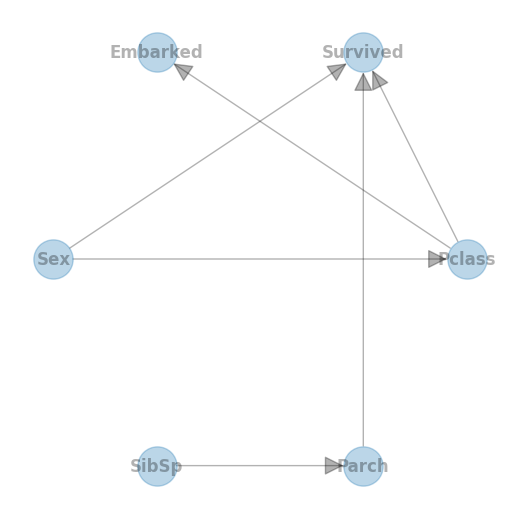

In [124]:
import networkx as nx
import matplotlib.pyplot as plt
directed = True
if directed:
    G = nx.DiGraph()
else:
    G = nx.Graph()
G.add_edges_from(flai_graph.graph['model_edges'])
plt.figure(figsize=(5,5)) 
nx.draw_circular(
    G, with_labels=True, arrowsize=30, node_size=800, 
    alpha=0.3, font_weight="bold"
)

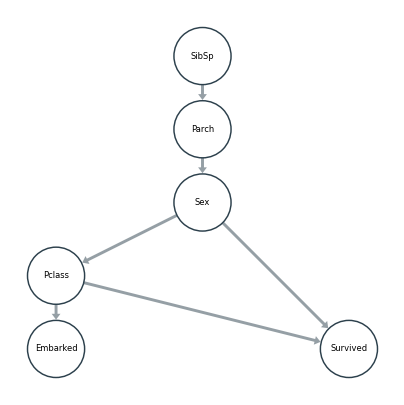

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

from netgraph import Graph,InteractiveGraph

plt.figure(figsize=(5,5)) 
Graph(G, node_layout='dot', node_shape= 'o',
node_labels=True ,node_size=10, arrows = True
    )

In [ ]:
def change_edge_relation(sensible_feature = []):
    if len(sensible_feature) == 0:
        raise Exception("Sensible features should be provided")
impacted = [e for e in flai_graph.graph['model_edges'] if e[0] == 'Sex' ]
fair_edges = []
for e in flai_graph.graph['model_edges']:
    if e[1] == 'Sex':
        for e_impacted in impacted:
            fair_edges = fair_edges + [(e[0],e_impacted[1])]
    else:
        fair_edges = fair_edges + [e]
fair_edges

[('Survived', 'Parch'),
 ('Sex', 'Parch'),
 ('Pclass', 'Survived'),
 ('Pclass', 'Parch'),
 ('Pclass', 'Embarked'),
 ('Parch', 'SibSp')]

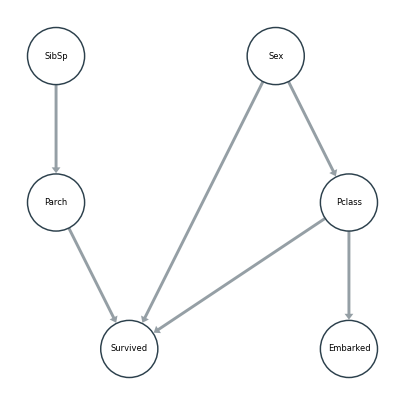

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

from netgraph import Graph,InteractiveGraph
edges = [('Pclass', 'Survived'),
 ('Pclass', 'Embarked'),
 ('Sex', 'Survived'),
 ('Sex', 'Pclass'),
 ('SibSp', 'Parch'),
 ('Parch', 'Survived')]
plt.figure(figsize=(5,5)) 
Graph(edges, node_layout='dot', node_shape= 'o',
node_labels=True ,node_size=10, arrows = True
    )

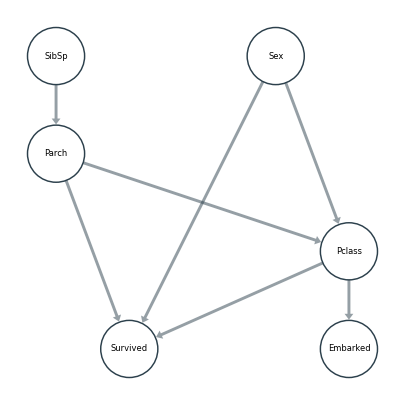

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

from netgraph import Graph,InteractiveGraph
edges = flai_graph.mitigate_edge_relation(sensible_feature = ['Sex'])
plt.figure(figsize=(5,5)) 
Graph(edges, node_layout='dot', node_shape= 'o',
node_labels=True ,node_size=10, arrows = True
    )


In [ ]:
### reentrenar usando estos nuevos edge, donde la variable sensible se ha eliminado de las relaciones
### asumiendo que pclass no es un proxy i van por transitividad, unida directamente con el objetivo.


In [ ]:
base_edge = [('Pclass', 'Embarked'),
 ('Pclass', 'Survived'),
 ('Sex', 'Survived'),
 ('Sex', 'Pclass'),
 ('SibSp', 'Parch'),
 ('Parch', 'Sex')]
list_edge_o = [e[0] for e in base_edge]
list_edge_f =  [e[1] for e in base_edge]
result_cpd = {}
for o in list_edge_o:
    if o not in list_edge_f:
        print('------------')
        print(o)
        result_cpd.update({o : {i : v for i,v in zip(flai_dataset.data[o].value_counts().index.values,
                                (flai_dataset.data[o].value_counts() / len(flai_dataset.data)).values)}})
        print('---------')

------------
SibSp
---------


In [ ]:
result_cpd

{'SibSp': {1: 0.6823793490460157,
  2: 0.2345679012345679,
  3: 0.031425364758698095,
  5: 0.020202020202020204,
  4: 0.017957351290684626,
  0: 0.013468013468013467}}

In [ ]:
CPDs['Parch']

,Parch,Sex,p
0,0,0,0.035032
1,0,1,0.006932
2,1,0,0.617834
3,1,1,0.838821
4,2,0,0.191083
5,2,1,0.100520
6,3,0,0.156051
7,3,1,0.053726


In [ ]:
list_edge_o.remove('SibSp')

In [ ]:
list_edge_o

['Pclass', 'Pclass', 'Sex', 'Sex', 'Parch']

In [ ]:
list_edge_f

['Embarked', 'Survived', 'Survived', 'Pclass', 'Parch', 'Sex']

In [ ]:
{i : v for i,v in zip(flai_dataset.data[flai_dataset.data['SibSp'] == 1]['Parch'].value_counts().index.values,
                            (flai_dataset.data[flai_dataset.data['SibSp'] == 1]['Parch'].value_counts() / len(flai_dataset.data[flai_dataset.data['SibSp'] == 1])).values)}

{1: 0.8832236842105263,
 2: 0.0625,
 3: 0.047697368421052634,
 0: 0.006578947368421052}

In [ ]:
result_cpd

{'SibSp': {1: 0.6823793490460157,
  2: 0.2345679012345679,
  3: 0.031425364758698095,
  5: 0.020202020202020204,
  4: 0.017957351290684626,
  0: 0.013468013468013467}}

In [ ]:
flai_dataset.data[flai_dataset.data['Parch'] == 0]['SibSp'].value_counts().index.values

array([2, 1, 3])

In [ ]:
flai_graph.graph['model'].nodes()

NodeView(('Survived', 'Sex', 'Pclass', 'Embarked', 'Parch', 'SibSp'))

In [ ]:
flai_graph.graph['model'].get_cpds()

[<TabularCPD representing P(Survived:2 | Pclass:3) at 0x7f2aa7e7fc40>,
 <TabularCPD representing P(Sex:2 | Pclass:3, Survived:2) at 0x7f2aa50cf130>,
 <TabularCPD representing P(Pclass:3) at 0x7f2aa5080fd0>,
 <TabularCPD representing P(Embarked:4 | Pclass:3) at 0x7f2aa71e3f10>,
 <TabularCPD representing P(Parch:4 | Sex:2) at 0x7f2aa50cf610>,
 <TabularCPD representing P(SibSp:6 | Parch:4) at 0x7f2aa7459d90>]

In [ ]:
from pgmpy.factors.discrete import TabularCPD


In [ ]:
cpd1 = flai_graph.get_CPDs()

In [ ]:
flai_graph.calculate_cpd()

In [ ]:
cpd2 = flai_graph.get_CPDs()

In [ ]:
cpd1['Survived']

,Survived,Pclass,p
0,0,0,0.370370
1,0,1,0.527174
2,0,2,0.757637
3,1,0,0.629630
4,1,1,0.472826
5,1,2,0.242363


In [ ]:
print((0.299363 + 0.211438) / 2)
print((0.242038 + 0.187175) / 2)
print((0.458599 + 0.601386) / 2)

0.2554005
0.2146065
0.5299925


In [ ]:
flai_graph.graph['model_edges']

[('Pclass', 'Survived'),
 ('Pclass', 'Embarked'),
 ('Sex', 'Survived'),
 ('Sex', 'Pclass'),
 ('SibSp', 'Parch'),
 ('Parch', 'Sex')]

In [ ]:
import numpy as np
import itertools
sensible = 'Sex'
list_cpd = []
for node in list(flai_graph.graph['model'].nodes()):
    node_value = list(np.sort(flai_graph.flai_dataset.data[node].unique()))
    evidence = [edge[0] for edge in flai_graph.graph['model_edges'] if edge[1] == node]
    evidence_value = [list(np.sort(flai_graph.flai_dataset.data[e].unique())) for e in evidence]
        
    evidence_combination = evidence_value
    evidence_combination = list(itertools.product(*evidence_combination))
    list_probas = []
    for ec in evidence_combination:
        filters = [[filter[0],filter[1]]  for filter in zip(evidence,ec)]
        data_aux =  flai_graph.flai_dataset.data
        for f in filters:
            if f[0] != sensible:
                data_aux = data_aux[data_aux[f[0]] == f[1]]
        list_probas = list_probas + [[(data_aux[node] == nv).sum() / len(data_aux[node] == nv) for nv in node_value]]
    list_cpd = list_cpd + [TabularCPD(node, len(node_value), np.array(list_probas).T.tolist(),
                   evidence= evidence,
                   evidence_card= [len(ev) for ev in evidence_value])]


In [ ]:
list_cpd

[<TabularCPD representing P(Pclass:3 | Sex:2) at 0x7fb2ab5496d0>,
 <TabularCPD representing P(Survived:2 | Pclass:3, Sex:2) at 0x7fb2bbbdb730>,
 <TabularCPD representing P(Embarked:4 | Pclass:3) at 0x7fb2ab5495e0>,
 <TabularCPD representing P(Sex:2 | Parch:4) at 0x7fb2ab5fc460>,
 <TabularCPD representing P(SibSp:6) at 0x7fb2ab350130>,
 <TabularCPD representing P(Parch:4 | SibSp:6) at 0x7fb2b97b6f70>]

In [ ]:
flai_graph = causal_graph.CausalGraph(node_edge = list(flai_graph.graph['model_edges']), CPD=list_cpd)

In [ ]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(flai_graph.graph['model'])
q = infer.query(variables=['Survived'], evidence={
                                'Sex':0})
print(q.scope())
print(q.values)

['Survived']
[0.25796178 0.74203822]


In [ ]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(flai_graph.graph['model'])
q = infer.query(variables=['Survived'], evidence={
                                'Sex':1})
print(q.scope())
print(q.values)

['Survived']
[0.81109185 0.18890815]


In [ ]:
flai_graph.mitigate_calculation_cpd(sensible_feature = 'Sex')

In [ ]:
flai_graph.graph['model_edges']

OutEdgeView([('Pclass', 'Survived'), ('Pclass', 'Embarked'), ('Sex', 'Survived'), ('Sex', 'Pclass'), ('SibSp', 'Parch'), ('Parch', 'Sex')])

In [ ]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(flai_graph.graph['model'])
q = infer.query(variables=['Survived'], evidence={
                                'Sex':0})
print(q.scope())
print(q.values)

['Survived']
[0.61616162 0.38383838]


In [ ]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(flai_graph.graph['model'])
q = infer.query(variables=['Survived'], evidence={
                                'Sex':1})
print(q.scope())
print(q.values)

['Survived']
[0.61616162 0.38383838]


In [ ]:
flai_graph.graph['model'].nodes

NodeView(('Pclass', 'Survived', 'Embarked', 'Sex', 'SibSp', 'Parch'))

In [ ]:
import bnlearn as bn
data = flai_dataset.data[['Parch', 'Sex', 'Pclass', 'Embarked', 'SibSp']]
data['Pclass'] = data['Pclass'] - 1
out = bn.predict(flai_graph.graph, data
, variables = ['Survived'])
flai_dataset.data['Predicted'] = out.Survived

[bnlearn]> Remaining columns for inference: 5


100%|██████████| 110/110 [00:00<00:00, 988.15it/s]


In [ ]:
#### male = 1 female = 0
flai_dataset.fairness_metrics(target_column='Survived', predicted_column = 'Predicted',
                            columns_fair = {'Sex' : {'privileged' : 0, 'unprivileged' : 1}})

Calculating metrics for : Sex  the value :  0
Calculating metrics for : Sex  the value :  1


{'model': {'ACC': 0.6790123456790124,
  'TPR': 0.39766081871345027,
  'FPR': 0.14571948998178508,
  'FNR': 0.6023391812865497,
  'PPP': 0.24242424242424243},
 'Sex': {'privileged': {'ACC': 0.5382165605095541,
   'TPR': 0.3905579399141631,
   'FPR': 0.037037037037037035,
   'FNR': 0.6094420600858369,
   'PPP': 0.29936305732484075},
  'unprivileged': {'ACC': 0.755632582322357,
   'TPR': 0.41284403669724773,
   'FPR': 0.16452991452991453,
   'FNR': 0.5871559633027523,
   'PPP': 0.21143847487001732},
  'fair_metrics': {'Equal_Opportunity_Difference': 0.02228609678308463}}}

In [118]:
flai_graph.graph['model_edges'] =  [('Pclass', 'Survived'),
 ('Pclass', 'Embarked'),
 ('Sex', 'Survived'),
 ('Sex', 'Pclass'),
 ('SibSp', 'Parch'),
 ('Parch', 'Survived')]

In [119]:
flai_graph.mitigate_calculation_cpd(sensible_feature = 'Sex')

In [120]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(flai_graph.graph['model'])
q = infer.query(variables=['Survived'], evidence={
                                'Sex':0})
print(q.scope())
print(q.values)

['Survived']
[0.61888926 0.38111074]


In [121]:
from pgmpy.inference import VariableElimination
infer = VariableElimination(flai_graph.graph['model'])
q = infer.query(variables=['Survived'], evidence={
                                'Sex':1})
print(q.scope())
print(q.values)

['Survived']
[0.61888926 0.38111074]


In [122]:
import bnlearn as bn
data = flai_dataset.data[['Parch', 'Sex', 'Pclass', 'Embarked', 'SibSp']]
data['Pclass'] = data['Pclass'] - 1
out = bn.predict(flai_graph.graph, data
, variables = ['Survived'])
flai_dataset.data['Predicted'] = out.Survived

[bnlearn]> Remaining columns for inference: 5


100%|██████████| 110/110 [00:00<00:00, 1024.83it/s]


In [123]:
#### male = 1 female = 0
flai_dataset.fairness_metrics(target_column='Survived', predicted_column = 'Predicted',
                            columns_fair = {'Sex' : {'privileged' : 0, 'unprivileged' : 1}})

Calculating metrics for : Sex  the value :  0
Calculating metrics for : Sex  the value :  1


{'model': {'ACC': 0.7115600448933782,
  'TPR': 0.5116959064327485,
  'FPR': 0.16393442622950818,
  'FNR': 0.48830409356725146,
  'PPP': 0.29741863075196406},
 'Sex': {'privileged': {'ACC': 0.6305732484076433,
   'TPR': 0.51931330472103,
   'FPR': 0.04938271604938271,
   'FNR': 0.48068669527896996,
   'PPP': 0.3980891719745223},
  'unprivileged': {'ACC': 0.755632582322357,
   'TPR': 0.4954128440366973,
   'FPR': 0.18376068376068377,
   'FNR': 0.5045871559633027,
   'PPP': 0.24263431542461006},
  'fair_metrics': {'Equal_Opportunity_Difference': -0.023900460684332714}}}

In [ ]:
bn.inference.fit(flai_graph.graph, variables=['Survived'], evidence={'Pclass':2,
                                                          'Embarked':1,
                                                          'Sex':0,
                                                          'SibSp':5,
                                                          'Parch':2})

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+------------+----------+
|    |   Survived |        p |
+====+============+==========+
|  0 |          0 | 0.616162 |
+----+------------+----------+
|  1 |          1 | 0.383838 |
+----+------------+----------+


<DiscreteFactor representing phi(Survived:2) at 0x7f13d4f52f40>

In [95]:
bn.inference.fit(flai_graph.graph, variables=['Survived'], evidence = {'Sex' : 1}).df
#evidence={'Pclass':2,'Embarked':1,'Sex':0, 'SibSp':5,'Parch':2,Survived}

[bnlearn] >Variable Elimination..
[bnlearn] >Data is stored in [query.df]
+----+------------+----------+
|    |   Survived |        p |
+====+============+==========+
|  0 |          0 | 0.811092 |
+----+------------+----------+
|  1 |          1 | 0.188908 |
+----+------------+----------+


,Survived,p
0,0,0.811092
1,1,0.188908


In [113]:
flai_dataset.data[['Survived', 'Parch', 'Sex', 'Pclass', 'Embarked', 'SibSp']].to_pickle('original.pickle')


In [125]:
mitigate_data = flai_graph.generate_dataset(n_samples = 891, methodtype = 'bayes')

In [126]:
mitigate_data.data.to_pickle('final_bis.pickle')